In [3]:
import random
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
from tqdm import tqdm

### Generate Data

In [13]:
def generate_data(m, n):
    a = [1, -1]
    X = np.zeros((m, n))
    y = np.zeros((m))
    for i in range(0,m):
        for j in range(0,n):
            X[i,j] = random.choice(a)
        y[i] = X[i, 0]
    
    return X, y

## Algorithms

Lets implement all the algorithms 

### Perceptron

In [19]:
X, y = generate_data(30,30)
X_test, y_test = generate_data(30, 30)

In [24]:
def perceptron(X, y, X_test):
    examples = X.shape[0]
    dim = X.shape[1]
    
    # train
    w = np.zeros(dim)
    for i in range(examples):
        y_pred = np.sign(np.dot(w, X[i]))
        if y[i]*y_pred <= 0:
            w += (y[i]*X[i])
            
    # test
    print(w)
    y_preds = np.sign(np.dot(X_test, w ))
    return y_preds

In [25]:
perceptron(X, y, X_test)

[ 6.  0.  0.  0. -2. -2.  2.  0.  2.  2.  0. -2.  2.  2. -2.  2.  0.  0.
 -2.  2.  2.  0. -2.  0.  4.  0.  0. -2.  2.  0.]


array([-1., -1., -1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.,
        1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,
        1., -1., -1.,  1.])

### Winnow

In [6]:
def winnow(X, y, X_test):
    examples = X.shape[0]
    dim = X.shape[1]
        
    # train
    w = np.ones(dim)
    for i in range(examples):
        if np.dot(w, X[i]) < dim:
            y_pred = 0
        else:
            y_pred = 1
        if y[i] != y_pred:
            w = w*(2**((y[i] - y_pred)*X[i]))
            
    # test  
    y_preds = np.zeros(examples)
    pos_ix = np.dot(X_test, w) >= dim
    y_preds[pos_ix] = 1
            
    return y_preds

### Least Squares

In [7]:
def least_squares(X, y, X_test):
    # train
    coeffs = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
    
    # test
    y_preds = np.sign(X_test.dot(coeffs))
    
    return y_preds

### 1-NN

In [8]:
from scipy.spatial.distance import cdist

def nn(X, y, X_test):
    
    #train 
    
    #test
    distances = cdist(X_test, X, metric='euclidean')
    y_preds = y[np.argmin(distances, axis=1)]
    
    return y_preds

## Approximate Sample Complexity

Least Squares

In [10]:
def sample_comp(max_n, algo, verbose=False):
    s_comp = np.zeros(max_n)
    for n in tqdm(range(1, max_n+1)):
        m = 1
        while True:
            num_samples = m
            #gen train data
            X_train, y_train = generate_data(num_samples, n)
            #gen test data
            X_test, y_test = generate_data(30, n)                
            #predict
            y_pred = algo(X_train, y_train, X_test)
            #find error rate
            err_rate = 1-(np.sum(y_pred == y_test)/len(y_test))
            if err_rate <= 0.1:
                s_comp[n-1] = m
                break
            m += 1
    if verbose:
        plt.figure()
        plt.plot(range(1,max_n + 1),s_comp)
        plt.xlabel('dimension n')
        plt.ylabel('sample complexity m')
        plt.title('sample complexity')
        plt.show()
    return s_comp

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 171.40it/s]


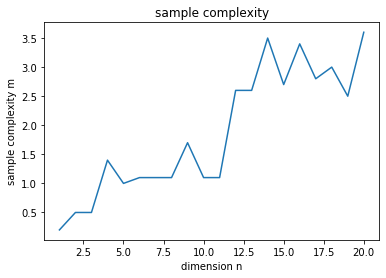

In [11]:
runs = 2
avg_s_comp = np.zeros((10, 20))
for i in range(0, runs):
    avg_s_comp[i] = sample_comp(20, perceptron)
plt.figure()
plt.plot(range(1,20 + 1),np.mean(avg_s_comp,axis=0))
plt.xlabel('dimension n')
plt.ylabel('sample complexity m')
plt.title('sample complexity')
plt.show()